In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Diwali_Sales.csv", encoding="unicode_escape")


In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [ ]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [ ]:
df.isnull()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [ ]:
df.shape

(11251, 13)

In [ ]:
avg = df['Amount'].mean()
df.loc[df['Amount']>avg,['Age Group','Gender']].head(14)

,Age Group,Gender
0,26-35,F
1,26-35,F
2,26-35,F
3,0-17,M
4,26-35,M
5,26-35,M
6,18-25,F
8,26-35,M
9,26-35,F
10,26-35,M


In [18]:
df['Age Group'].mode()

,Age Group
0,26-35


*The below graph shows the amount of money spent by people working in different occupations..Those who're working IT,healthcare,aviation, government spent more money as their income is higher*

Text(0.5, 1.0, 'GRAPH A')

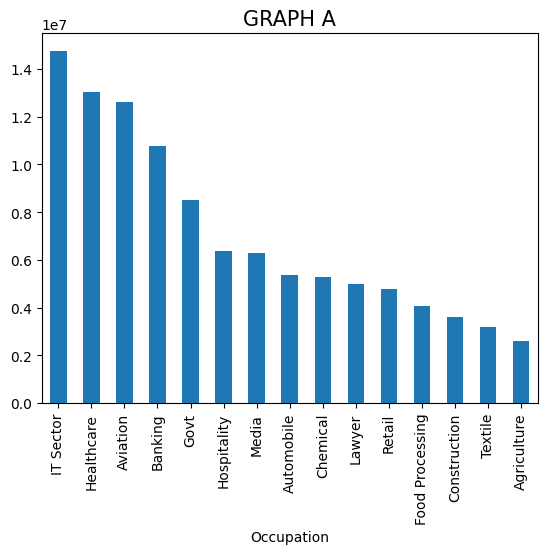

In [ ]:
df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("GRAPH A",fontsize = 15)

<function matplotlib.pyplot.show(close=None, block=None)>

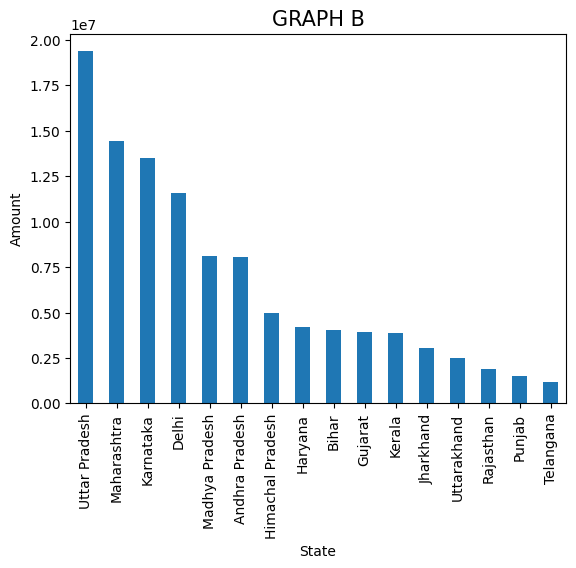

In [ ]:
df.groupby("State")["Amount"].sum().sort_values(ascending=False).plot(kind = 'bar')
plt.xticks(rotation=90)
plt.ylabel("Amount")
plt.xlabel("State")
plt.title("GRAPH B",fontsize=15)
plt.show

In [ ]:
a = df.loc[df["State"]=="Maharashtra"]['Occupation'].mode()
a1 = df.loc[df["State"]=="Uttar Pradesh"]['Occupation'].mode()
a2 = df.loc[df["State"]=="Karnataka"]['Occupation'].mode()
print("Maharashtra - ",a)
print("Uttar Pradesh - ",a1)
print("Karnataka - ",a2)

Maharashtra -  0    IT Sector
Name: Occupation, dtype: object
Uttar Pradesh -  0    IT Sector
Name: Occupation, dtype: object
Karnataka -  0    IT Sector
Name: Occupation, dtype: object


***Graphs A and B*** shows the states with the most amount of sales and the occupations that spent the most amount of money.  
- The top 3 states are **Uttar Pradesh,Maharashtra and Karnataka**   
- The occupation that spent the most amount of money is **IT**
-The above cell shows the correlation between the both
- *this type of information helps companies to target specific areas in those specific states where there are the no. of such workplaces are more common, getting faster access to target audience*

Text(0.5, 1.0, 'Amount spent by Gender')

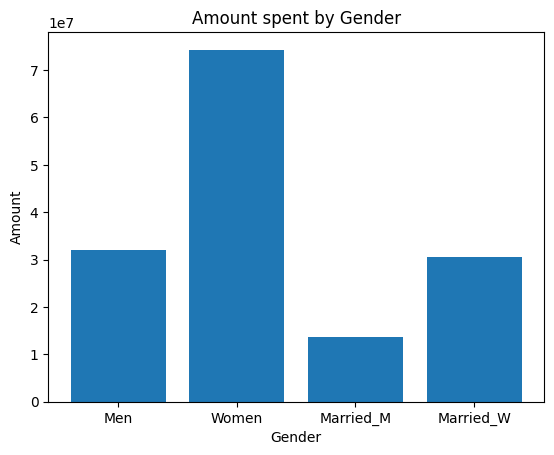

In [ ]:
m1 = df.loc[df['Gender']=='M','Amount'].sum()
f1 = df.loc[df['Gender']=='F','Amount'].sum()
m2 = df.loc[(df['Gender']=='M') & (df['Marital_Status']==1),'Amount'].sum()
f2 = df.loc[(df['Gender']=='F') & (df['Marital_Status']==1),'Amount'].sum()
plt.figure()
plt.bar(['Men','Women','Married_M','Married_W'],[m1,f1,m2,f2])
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount spent by Gender')



From the above graph ,we know that unmarried women were the ones who were willing to spent the most.

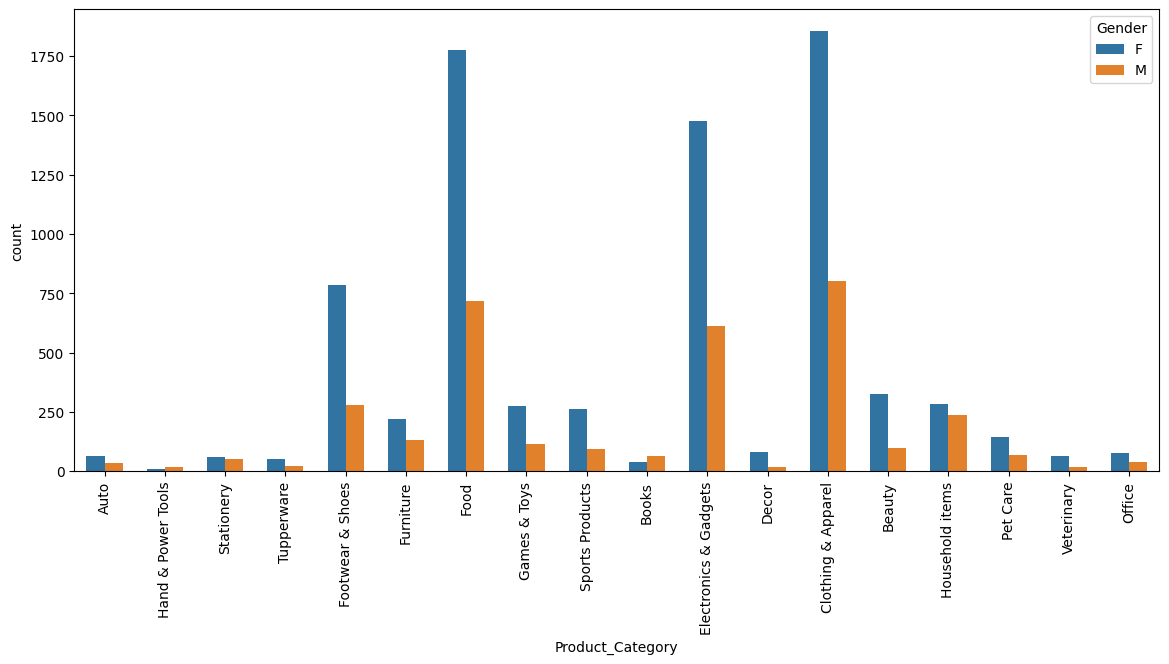

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Product_Category', hue='Gender', data=df,width=0.6)
plt.xticks(rotation=90, fontsize=10)
plt.show()


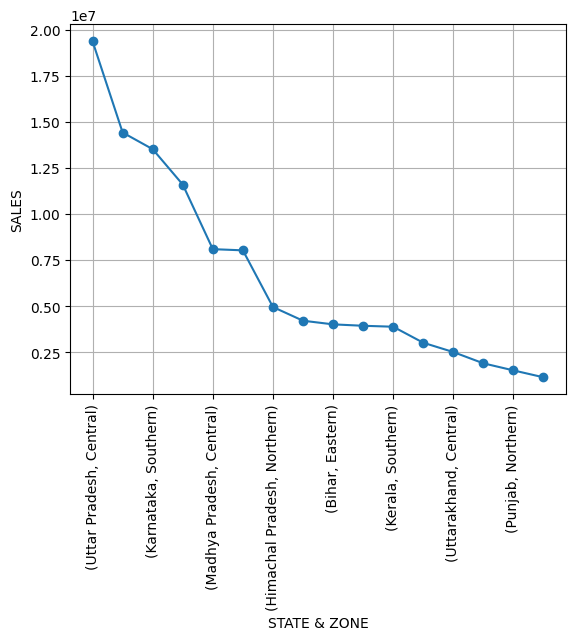

In [ ]:
df.groupby(["State", "Zone"]).sum()["Amount"].sort_values(ascending=False).plot(marker="o")
plt.xticks(rotation = 90)
plt.xlabel("STATE & ZONE")
plt.ylabel("SALES")
plt.grid()
plt.show()

***The above graph shows which state , zone (in the state) had the most amount of sales ⚓***

CONCLUSION:
- Unmarried women contributed the most to the purchases..followed by unmarried men
- **Food,Clothing and Electronics** were the most demanded products
- Certain states depending on the zone like **Uttar Pradesh(central) ,Karnartaka(Southern),Madhya Pradesh(Central)** had more customers
- most of the customers were in the **age group 26 to 35**
- peope belonging to** IT,Aviation and Banking** sectors spent more due to higher salaries,hence states with more such organizations had more sales

Quotes -
    “The aim of marketing is to know and understand the customer so well the product or service fits him and sells itself.”
